# Projet Labo 3A : Analyse des fractures de la grotte de Villars

## Import des bibliothèques 
Ca peut prendre plusieurs secondes 

In [1]:
from time import perf_counter
start=perf_counter()
import pandas as pd 
print("pandas: ",perf_counter()-start)
start=perf_counter()
import matplotlib.pyplot as plt
print("matplotlib: ",perf_counter()-start)
start=perf_counter()
import csv
print("csv: ",perf_counter()-start)
start=perf_counter()
from sklearn.cluster import DBSCAN
print("DBSCAN: ",perf_counter()-start)
start=perf_counter()
from sklearn.preprocessing import StandardScaler
print("StandardScaler: ",perf_counter()-start)
start=perf_counter()
import mplstereonet
print("mplstereonet: ",perf_counter()-start)
import numpy as np
import matplotlib.pyplot as plt

pandas:  4.741066899999993
matplotlib:  1.8995529000000033
csv:  4.139999998642452e-05
DBSCAN:  10.686690999999996
StandardScaler:  6.880000000819564e-05
mplstereonet:  0.0947064999999725


## Lecture du fichier
Affiche les moyennes et écarts types des fractures importés depuis Cloud Compare en fichier .csv  
Donne la représentation stéréographique des différentes fractures

Moyenne des azimuts (Toute orientation confondu) : 136.82625217391305
Écart type des azimuts (Toute orientation confondu) : 14.20195289340196
Valeur maximale des azimuts (Toute orientation confondu) : 165.297
Valeur minimale des azimuts (Toute orientation confondu) : 114.65299999999999

Moyenne des azimuts (90°-180°) : 136.21829166666666
Écart type des azimuts (90°-180°) : 13.491308968882173
Valeur maximale des azimuts (90°-180°) : 165.297
Valeur minimale des azimuts (90°-180°) : 114.65299999999999

Moyenne des azimuts (270°-360°) : 317.48948181818184
Écart type des azimuts (270°-360°) : 15.542704346708057
Valeur maximale des azimuts (270°-360°) : 343.9552
Valeur minimale des azimuts (270°-360°) : 295.0



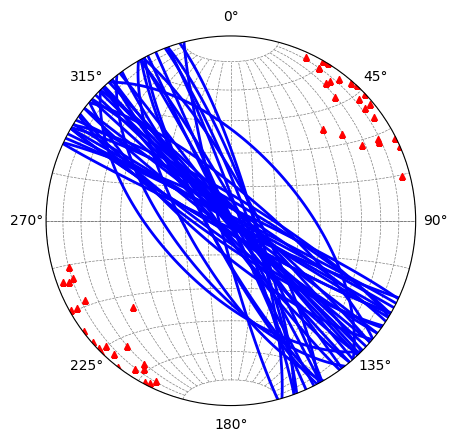

In [2]:
# Ouvrir le fichier CSV en mode lecture
with open('Plans_18_02.csv', newline='') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv, delimiter=';')
    # Ignorer l'en-tête s'il existe
    next(lecteur_csv)
    # Parcourir les lignes et afficher la valeur de la n-ieme colonne (par exemple, la 3e colonne)
    azimut = []
    azimut_90_180 = []
    pendage = []
    for ligne in lecteur_csv:
        dip_orientation = float(ligne[10])
        dip = float(ligne[9])
        if dip_orientation <= 90:
            orientation = 270 + dip_orientation
        else:
            orientation = dip_orientation - 90
        azimut.append(orientation)
        pendage.append(dip)
        if orientation <= 180:
            azimut_90_180.append(orientation)
        if orientation > 180: 
            azimut_90_180.append(orientation - 180)

data = {
    'azimut': azimut,
    'pendage': pendage
}
df = pd.DataFrame(data)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['azimut', 'pendage']])

# Séparer le DataFrame en deux blocs
df_90_180 = df[(df['azimut'] >= 90) & (df['azimut'] <= 180)]
df_270_360 = df[(df['azimut'] >=270) & (df['azimut'] <= 360)]

# Calculs pour le bloc concaténé de tous les azimuts remis entre 90 et 180 (donc celui où la direction de pendage n'importe pas mais juste l'azimut)
moyenne_azimut_tot = np.mean(azimut_90_180)
ecart_type_azimut_tot = np.std(azimut_90_180)
max_azimut_tot = np.max(azimut_90_180)
min_azimut_tot = np.min(azimut_90_180)

print(f"Moyenne des azimuts (Toute orientation confondu) : {moyenne_azimut_tot}")
print(f"Écart type des azimuts (Toute orientation confondu) : {ecart_type_azimut_tot}")
print(f"Valeur maximale des azimuts (Toute orientation confondu) : {max_azimut_tot}")
print(f"Valeur minimale des azimuts (Toute orientation confondu) : {min_azimut_tot}")
print()

# Calculs pour le bloc 90°-180°
moyenne_azimut_90_180 = df_90_180['azimut'].mean()
ecart_type_azimut_90_180 = df_90_180['azimut'].std()
max_azimut_90_180 = df_90_180['azimut'].max()
min_azimut_90_180 = df_90_180['azimut'].min()

print(f"Moyenne des azimuts (90°-180°) : {moyenne_azimut_90_180}")
print(f"Écart type des azimuts (90°-180°) : {ecart_type_azimut_90_180}")
print(f"Valeur maximale des azimuts (90°-180°) : {max_azimut_90_180}")
print(f"Valeur minimale des azimuts (90°-180°) : {min_azimut_90_180}")
print()
   
# Calculs pour le bloc 270°-360°
moyenne_azimut_270_360 = df_270_360['azimut'].mean()
ecart_type_azimut_270_360 = df_270_360['azimut'].std()
max_azimut_270_360 = df_270_360['azimut'].max()
min_azimut_270_360 = df_270_360['azimut'].min()

print(f"Moyenne des azimuts (270°-360°) : {moyenne_azimut_270_360}")
print(f"Écart type des azimuts (270°-360°) : {ecart_type_azimut_270_360}")
print(f"Valeur maximale des azimuts (270°-360°) : {max_azimut_270_360}")
print(f"Valeur minimale des azimuts (270°-360°) : {min_azimut_270_360}")
print()

fig = plt.figure()
ax = fig.add_subplot(111, projection='stereonet')

# Plot all data points without clustering
ax.plane(azimut, pendage, color='blue', linewidth=2)
ax.pole(azimut, pendage, '^', color='red', markersize=4)

ax.set_longitude_grid(10)
ax.set_longitude_grid_ends(75)
ax.grid(which='both', linestyle='dashed', color='gray', linewidth=0.5)

plt.show()

## Histogramme des azimuts
Les données sont toutes replacées entre 90° et 180° car la direction de pendage n'est pas prise en compte dans notre cas

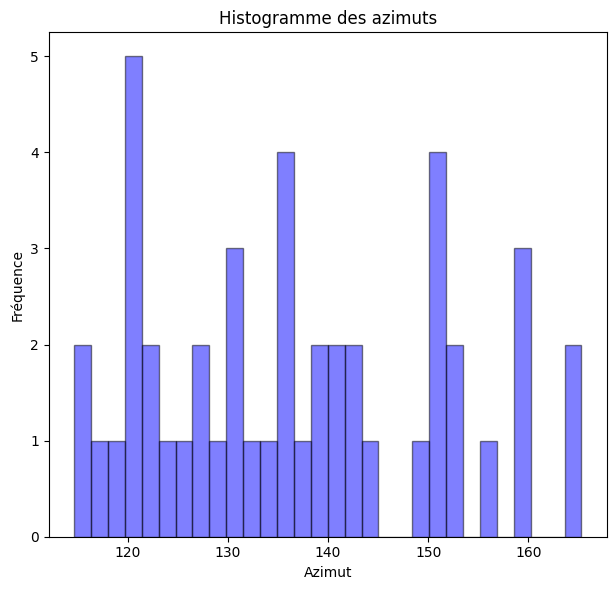

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# Utiliser les données existantes pour l'azimut et le pendage
plt.figure(figsize=(12, 6))

# Histogramme pour les azimuts
plt.subplot(1, 2, 1)
plt.hist(azimut_90_180, bins=30, alpha=0.5, color='blue', edgecolor='black')
plt.title('Histogramme des azimuts')
plt.xlabel('Azimut')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

## Test de clustering ?

In [4]:

# couleurs_str = {
#     '-1': 'gray',
#     '0': 'red',  # Rouge
#     '1': 'blue',  # Bleu
#     '2': 'green',  # Vert
#     '3': 'orange',  # Orange
#     '4': 'purple',  # Violet
#     '5': 'cyan',  # Cyan
#     '6': 'magenta',  # Magenta
#     '7': 'yellow',  # Jaune
#     '8': 'black',  # Noir
# }

# couleurs = {int(k): v for k, v in couleurs_str.items()}

# # DBSCAN clustering
# db = DBSCAN(eps=0.5, min_samples=2)
# # Eps (epsilon) : Distance maximale entre deux points pour qu'ils soient considérés comme dans le même voisinage.
# # Min_samples : Nombre minimal de points requis pour former un cluster.
# labels = db.fit_predict(data_scaled)

# # Ajout des labels de cluster au DataFrame
# df['famille'] = labels

# print(df)

# df_azimuts_par_famille = df.groupby('famille')['azimut'].apply(list).reset_index()
# print(df_azimuts_par_famille)

# familles_uniques = df['famille'].unique()

# # Boucle pour afficher les azimuts selon chaque famille

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='stereonet')

# for famille in familles_uniques:
#     azimuts = df[df['famille'] == famille]['azimut'].tolist()
#     print(df[df['famille'] == famille]['azimut'].tolist())
#     strikes = df[df['famille'] == famille]['azimut'].tolist()
#     dips = df[df['famille'] == famille]['pendage'].tolist()
#     ax.plane(strikes, dips, color=f"{couleurs[famille]}", linewidth=2)
#     ax.pole(strikes, dips, '^', color='red', markersize=4)
# ax.set_longitude_grid(10)
# ax.set_longitude_grid_ends(75)
# ax.grid(which='both', linestyle='dashed', color='gray',
#         linewidth=0.5)  # '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

# #fig.tight_layout()
# plt.show()

## Diagramme de Rose des données

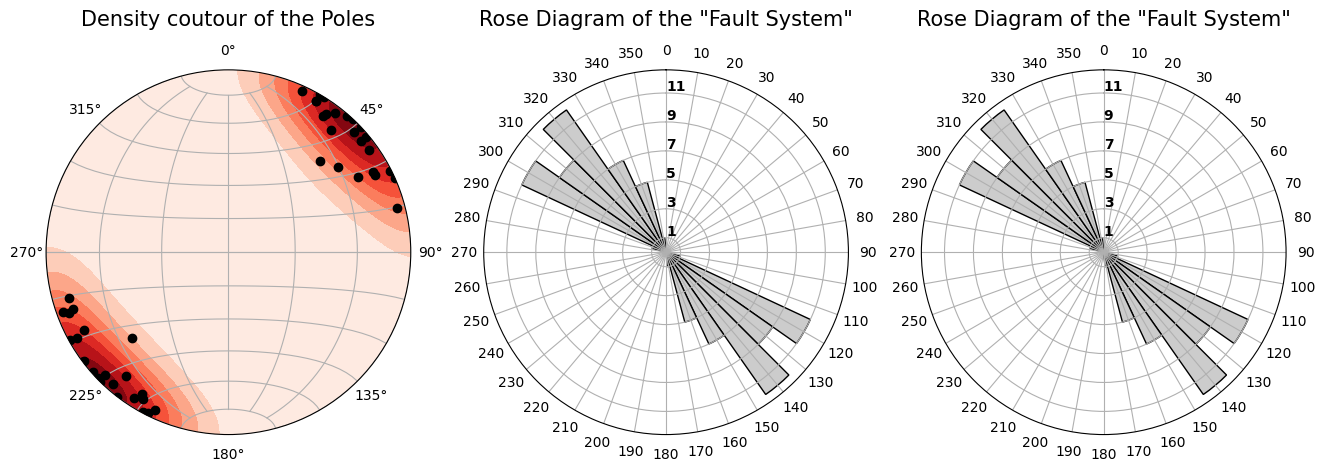

In [5]:

strikes = df['azimut'].tolist()
dips = df['pendage'].tolist()

%matplotlib inline

# strikes = np.concatenate([np.random.randint(0, 360, 60),
#                           np.random.randint(10, 60, 20),
#                           np.random.randint(190, 300, 20),
#                           np.random.randint(60, 90, 20)])

# dips = np.concatenate([np.random.randint(0, 90, 60),
#                        np.random.randint(60, 90, 60)])

# Convert strikes and dips to a pandas DataFrame
data = {
    'strikes': strikes,
    'dips': dips
}
df_strikes_dips = pd.DataFrame(data)

# Display the DataFrame
# print(df_strikes_dips)
bin_edges = np.arange(-5, 366, 10)
number_of_strikes, bin_edges = np.histogram(strikes, bin_edges)
number_of_strikes[0] += number_of_strikes[-1]
half = np.sum(np.split(number_of_strikes[:-1], 2), 0)
two_halves = np.concatenate([half, half])

fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(131, projection='stereonet')

ax.pole(strikes, dips, c='k', label='Pole of the Planes')
ax.density_contourf(strikes, dips, measurement='poles', cmap='Reds')
ax.set_title('Density coutour of the Poles', y=1.10, fontsize=15)
ax.grid()

ax = fig.add_subplot(132, projection='polar')

ax.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves, 
       width=np.deg2rad(10), bottom=0.0, color='.8', edgecolor='k')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
ax.set_rgrids(np.arange(1, two_halves.max() + 1, 2), angle=0, weight= 'black')
ax.set_title('Rose Diagram of the "Fault System"', y=1.10, fontsize=15)

# Deuxième Diagrame de Rose avec données entre 90° et 180°
ax = fig.add_subplot(133, projection='polar')

ax.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves, 
       width=np.deg2rad(10), bottom=0.0, color='.8', edgecolor='k')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
ax.set_rgrids(np.arange(1, two_halves.max() + 1, 2), angle=0, weight= 'black')
ax.set_title('Rose Diagram of the "Fault System"', y=1.10, fontsize=15)

plt.show()

## Transformation du fichier .csv (Cloud Compare)
### CSV to ASCII
Code pour passer du .csv (du export planes (E) de cloud compare à un ascii pour gocad), ne montre que les centres des points.

In [6]:
def csv_to_ascii_with_modified_coordinates(csv_file_path, ascii_file_path):
    with open(csv_file_path, 'r', newline='', encoding='utf-8') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        with open(ascii_file_path, 'w', encoding='ascii', errors='ignore') as ascii_file:
            next(csv_reader)  # Skip header
            ascii_file.write(f"NAME;X;Y;Z;\n")
            for row in csv_reader:
                x = float(row[2]) + 526900
                y = float(row[3]) + 6484890
                z = float(row[4])
                ascii_file.write(f"PLANE_BIS;{x};{y};{z};\n")

# Example usage
csv_to_ascii_with_modified_coordinates('Plans_test.csv', 'vertices_output_modified.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'Plans_test.csv'

### CSV to Gocad surface (.txt)
Fonction pour transformer un plan pour l'orienter selon la normale.

In [ ]:
import numpy as np

def calculate_vertices_with_normal(x, y, z, width, length, normal):
    x += 526900
    y += 6484890
    half_width = width / 2
    half_length = length / 2

    # Calculate the rotation matrix to align with the normal direction
    normal = np.array(normal)
    normal = normal / np.linalg.norm(normal)
    z_axis = np.array([0, 0, 1])
    v = np.cross(z_axis, normal)
    c = np.dot(z_axis, normal)
    k = 1 / (1 + c)
    rotation_matrix = np.array([
        [v[0] * v[0] * k + c, v[0] * v[1] * k - v[2], v[0] * v[2] * k + v[1]],
        [v[1] * v[0] * k + v[2], v[1] * v[1] * k + c, v[1] * v[2] * k - v[0]],
        [v[2] * v[0] * k - v[1], v[2] * v[1] * k + v[0], v[2] * v[2] * k + c]
    ])

    # Define the vertices in the local plane coordinates
    local_vertices = np.array([
        [-half_width, -half_length, 0],
        [half_width, -half_length, 0],
        [half_width, half_length, 0],
        [-half_width, half_length, 0]
    ])

    # Rotate the vertices to align with the normal direction
    rotated_vertices = np.dot(local_vertices, rotation_matrix.T)

    # Translate the vertices to the given (x, y, z) position
    vertices = rotated_vertices + np.array([x, y, z])
    vertices = [f"{vertex[0]} {vertex[1]} {vertex[2]}" for vertex in vertices]
    return vertices

# def csv_to_ascii_with_vertices_and_normal(csv_file_path, ascii_file_path):
#     with open(csv_file_path, 'r', newline='', encoding='utf-8') as csv_file:
#         csv_reader = csv.reader(csv_file, delimiter=';')
#         with open(ascii_file_path, 'w', encoding='ascii', errors='ignore') as ascii_file:
#             next(csv_reader)  # Skip header
#             ascii_file.write(f"NAME;X;Y;Z;FAMILLE;\n")
#             for row in csv_reader:
#                 x = float(row[3])
#                 y = float(row[4])
#                 z = float(row[5])
#                 width = float(row[1])
#                 length = float(row[2])
#                 normal = [float(row[6]), float(row[7]), float(row[8])]  # Assuming normal direction is in columns 6, 7, 8
#                 vertices = calculate_vertices_with_normal(x, y, z, width, length, normal)
#                 for vertex in vertices:
#                     famille = 1 if 90 <= orientation <= 180 else 0
#                     ascii_file.write(f"PLANE{csv_reader.line_num - 1};{vertex};{famille};\n")

# # Example usage
# csv_to_ascii_with_vertices_and_normal('Plans_18_02.csv', 'vertices_output_with_normal.txt')

# # 📌 Afficher le chemin du fichier généré
# import os
# file_path = os.path.abspath('vertices_output_with_normal.txt')
# print(f"✅ Fichier '{'vertices_output_with_normal.txt'}' créé avec succès !\n📂 Emplacement : {file_path}")

# # 📌 Afficher un aperçu du fichier généré
# with open('vertices_output_with_normal.txt', "r") as f:
#     preview = "".join(f.readlines()[:10])  # Afficher les 10 premières lignes
# print("\n--- Aperçu du fichier ---")
# print(preview)

### CSV to Gocad object (.MX), plans avec vertex au centre 
Créer plans avec un point au centre donc 4 triangles pour chaque plans et 5 vertex. Méthode pour importer directement un plan avec Import Gocad Objects (.mx)

Les plans sont alignés selon la normale (donc plus ou moins verticaux)

In [ ]:
def csv_to_ascii_with_vertices_and_normal(csv_file_path, ascii_file_path):
    with open(csv_file_path, 'r', newline='', encoding='utf-8') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        with open(ascii_file_path, 'w', encoding='ascii', errors='ignore') as ascii_file:
            next(csv_reader)  # Skip header
            for row in csv_reader:
                x = float(row[3])
                y = float(row[4])
                z = float(row[5])
                width = float(row[1])
                length = float(row[2])
                normal = [float(row[6]), float(row[7]), float(row[8])]  # Assuming normal direction is in columns 6, 7, 8
                vertices = calculate_vertices_with_normal(x, y, z, width, length, normal)
                ascii_file.write("GOCAD TSurf 1 \n" \
                                 "HEADER { \n" \
                                 "*solid*color: 0.854902 0.666667 0 1 \n" \
                                  f"name: PLANE {csv_reader.line_num -1} \n" \
                                  "mesh: on \n" \
                                  "cn: on \n" \
                                    "} \n" \
                                    "GOCAD_ORIGINAL_COORDINATE_SYSTEM \n" \
                                    "NAME 'SKUA Local' \n" \
                                    "PROJECTION 'NTF (Paris) / Lambert zone II' \n" \
                                    "DATUM 'Mean Sea Level' \n" \
                                    "AXIS_NAME X Y Z \n" \
                                    "AXIS_UNIT m m m \n" \
                                    "ZPOSITIVE Elevation \n" \
                                    "END_ORIGINAL_COORDINATE_SYSTEM \n" \
                                    "PROPERTY_CLASS_HEADER X { \n" \
                                    "kind: X \n" \
                                    "unit: m \n" \
                                    "} \n" \
                                    "PROPERTY_CLASS_HEADER Y { \n" \
                                    "kind: Y \n" \
                                    "unit: m \n" \
                                    "} \n" \
                                    "PROPERTY_CLASS_HEADER Z { \n" \
                                    "kind: Z \n" \
                                    "unit: m \n" \
                                    "is_z: on \n" \
                                    "} \n" \
                                    "PROPERTY_CLASS_HEADER vector3d { \n" \
                                    "kind: Length \n" \
                                    "unit: m \n" \
                                    "} \n" \
                                    "TFACE \n")
                for i, vertex in enumerate(vertices):
                    ascii_file.write(f"VRTX {i+1} {vertex}\n")
                ascii_file.write(f"VRTX 5 {x+526900} {y+6484890} {z}\n" \
                                 "TRGL 1 2 5 \n" \
                                 "TRGL 1 4 5 \n" \
                                 "TRGL 2 3 5 \n" \
                                 "TRGL 4 5 3 \n" \
                                 "BSTONE 4 \n" \
                                 "BORDER 5 4 3 \n" \
                                 "END \n")

# Example usage
csv_to_ascii_with_vertices_and_normal('Plans_18_02.csv', 'vertices_output_with_normal.mx')

# 📌 Afficher le chemin du fichier généré
import os
file_path = os.path.abspath('vertices_output_with_normal.mx')
print(f"✅ Fichier '{'vertices_output_with_normal.mx'}' créé avec succès !\n📂 Emplacement : {file_path}")

# 📌 Afficher un aperçu du fichier généré
with open('vertices_output_with_normal.mx', "r") as f:
    preview = "".join(f.readlines()[:10])  # Afficher les 10 premières lignes
print("\n--- Aperçu du fichier ---")
print(preview)

✅ Fichier 'vertices_output_with_normal.mx' créé avec succès !
📂 Emplacement : o:\Users\boutin15u\3-Projet_labo_3A\Code_Python\Projet_Lab_Visual\vertices_output_with_normal.mx

--- Aperçu du fichier ---
GOCAD TSurf 1 
HEADER { 
*solid*color: 0.854902 0.666667 0 1 
name: PLANE 1 
mesh: on 
cn: on 
} 
GOCAD_ORIGINAL_COORDINATE_SYSTEM 
NAME 'SKUA Local' 
PROJECTION 'NTF (Paris) / Lambert zone II' 



## Créer les Water Tables
Créer les water tables, attention les surfaces doivent être très petites

In [ ]:
def csv_to_Gocad_planes(csv_file_path, ascii_file_path):
    with open(csv_file_path, 'r', newline='', encoding='utf-8') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        with open(ascii_file_path, 'w', encoding='ascii', errors='ignore') as ascii_file:
            next(csv_reader)  # Skip header
            for row in csv_reader:
                x = float(row[3]) #+ 526900
                y = float(row[4]) #+ 6484890
                z = float(row[5])
                half_width = 1
                half_length = 1
                
                local_vertices = np.array([
                [-half_width, -half_length, 0],
                [half_width, -half_length, 0],
                [half_width, half_length, 0],
                [-half_width, half_length, 0]0
                
                ])

                # Translate the vertices to the given (x, y, z) position
                vertices = local_vertices + np.array([x, y, z])
                vertices = [f"{vertex[0]} {vertex[1]} {vertex[2]}" for vertex in vertices]
                
                ascii_file.write("GOCAD TSurf 1 \n" \
                                 "HEADER { \n" \
                                 "*solid*color: 0 0 1 1 \n" \
                                  f"name: WATER_TABLE_{csv_reader.line_num -1} \n" \
                                  "mesh: on \n" \
                                  "cn: on \n" \
                                    "} \n" \
                                    "GOCAD_ORIGINAL_COORDINATE_SYSTEM \n" \
                                    "NAME 'SKUA Local' \n" \
                                    "PROJECTION 'NTF (Paris) / Lambert zone II' \n" \
                                    "DATUM 'Mean Sea Level' \n" \
                                    "AXIS_NAME X Y Z \n" \
                                    "AXIS_UNIT m m m \n" \
                                    "ZPOSITIVE Elevation \n" \
                                    "END_ORIGINAL_COORDINATE_SYSTEM \n" \
                                    "PROPERTY_CLASS_HEADER X { \n" \
                                    "kind: X \n" \
                                    "unit: m \n" \
                                    "} \n" \
                                    "PROPERTY_CLASS_HEADER Y { \n" \
                                    "kind: Y \n" \
                                    "unit: m \n" \
                                    "} \n" \
                                    "PROPERTY_CLASS_HEADER Z { \n" \
                                    "kind: Z \n" \
                                    "unit: m \n" \
                                    "is_z: on \n" \
                                    "} \n" \
                                    "PROPERTY_CLASS_HEADER vector3d { \n" \
                                    "kind: Length \n" \
                                    "unit: m \n" \
                                    "} \n" \
                                    "TFACE \n")
                for i, vertex in enumerate(vertices):
                    ascii_file.write(f"VRTX {i+1} {vertex}\n")
                ascii_file.write("TRGL 1 2 3 \n" \
                                 "TRGL 1 4 3 \n" \
                                 "BSTONE 4 \n" \
                                 "BORDER 5 4 3 \n" \
                                 "END \n")
                
# Example usage
csv_to_Gocad_planes('Plans_18_02.csv', 'Water_Tables.mx')

# 📌 Afficher le chemin du fichier généré
import os
file_path = os.path.abspath('Water_Tables.mx')
print(f"✅ Fichier '{'Water_Tables.mx'}' créé avec succès !\n📂 Emplacement : {file_path}")

# 📌 Afficher un aperçu du fichier généré
with open('Water_Tables.mx', "r") as f:
    preview = "".join(f.readlines()[:10])  # Afficher les 10 premières lignes
print("\n--- Aperçu du fichier ---")
print(preview)

✅ Fichier 'Water_Tables.mx' créé avec succès !
📂 Emplacement : o:\Users\boutin15u\3-Projet_labo_3A\Code_Python\Projet_Lab_Visual\Water_Tables.mx

--- Aperçu du fichier ---
GOCAD TSurf 1 
HEADER { 
*solid*color: 0 0 1 1 
name: WATER_TABLE_1 
mesh: on 
cn: on 
} 
GOCAD_ORIGINAL_COORDINATE_SYSTEM 
NAME 'SKUA Local' 
PROJECTION 'NTF (Paris) / Lambert zone II' 



### CSV to Gocad object (.VS) des vertex set
Créer les points correspondants aux centres des plans de fractures pour représenter les outlets (ici les entrées dans la grotte)

In [ ]:
def csv_to_ascii_with_vertices_and_normal(csv_file_path, ascii_file_path):
    with open(csv_file_path, 'r', newline='', encoding='utf-8') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        with open(ascii_file_path, 'w', encoding='ascii', errors='ignore') as ascii_file:
            ascii_file.write("GOCAD VSet 1 \n" \
                                "HEADER { \n" \
                                "*atoms*symbol: sphere \n" \
                                "*atoms*size: 4 \n" \
                                "*atoms*color: #0000ff \n" \
                                "use_feature_color: false \n" \
                                "painted: on \n" \
                                "name: Outlets \n" \
                                "} \n" \
                                "GOCAD_ORIGINAL_COORDINATE_SYSTEM \n" \
                                "NAME 'SKUA Local' \n" \
                                "PROJECTION 'NTF (Paris) / Lambert zone II' \n" \
                                "DATUM 'Mean Sea Level' \n" \
                                "AXIS_NAME X Y Z \n" \
                                "AXIS_UNIT m m m \n" \
                                "ZPOSITIVE Elevation \n" \
                                "END_ORIGINAL_COORDINATE_SYSTEM \n" \
                                "PROPERTIES Index \n" \
                                "PROP_LEGAL_RANGES **none**  **none** \n" \
                                "NO_DATA_VALUES -99999 \n" \
                                "PROPERTY_CLASSES index \n" \
                                "PROPERTY_KINDS Number \n" \
                                "PROPERTY_SUBCLASSES QUANTITY Float \n" \
                                "ESIZES 1 \n" \
                                "UNITS unitless \n" \
                                "PROPERTY_CLASS_HEADER X { \n" \
                                "kind: X \n" \
                                "unit: m \n" \
                                "} \n" \
                                "PROPERTY_CLASS_HEADER Y { \n" \
                                "kind: Y \n" \
                                "unit: m \n" \
                                "} \n" \
                                "PROPERTY_CLASS_HEADER Z { \n" \
                                "kind: Z \n" \
                                "unit: m \n" \
                                "is_z: on \n" \
                                "} \n"
                                "PROPERTY_CLASS_HEADER index { \n" \
                                "kind: Number \n" \
                                "unit: unitless \n" \
                                "} \n")
            next(csv_reader)  # Skip header
            for row in csv_reader:
                x = float(row[3])
                y = float(row[4])
                z = float(row[5])
                ascii_file.write(f"PVRTX {csv_reader.line_num - 1} {x + 526900} {y + 6484890} {z} {csv_reader.line_num - 1} \n")
            ascii_file.write("END\n")


# Example usage
csv_to_ascii_with_vertices_and_normal('Plans_18_02.csv', 'Outlets_centre_plans.vs')

# 📌 Afficher le chemin du fichier généré
import os
file_path = os.path.abspath('Outlets_centre_plans.vs')
print(f"✅ Fichier '{'vOutlets_centre_plans.vs'}' créé avec succès !\n📂 Emplacement : {file_path}")

# 📌 Afficher un aperçu du fichier généré
with open('Outlets_centre_plans.vs', "r") as f:
    preview = "".join(f.readlines()[:10])  # Afficher les 10 premières lignes
print("\n--- Aperçu du fichier ---")
print(preview)

✅ Fichier 'vOutlets_centre_plans.vs' créé avec succès !
📂 Emplacement : o:\Users\boutin15u\3-Projet_labo_3A\Code_Python\Projet_Lab_Visual\Outlets_centre_plans.vs

--- Aperçu du fichier ---
GOCAD VSet 1 
HEADER { 
*atoms*symbol: sphere 
*atoms*size: 4 
*atoms*color: #0000ff 
use_feature_color: false 
painted: on 
name: Outlets 
} 
GOCAD_ORIGINAL_COORDINATE_SYSTEM 

